-0.9999999999999998


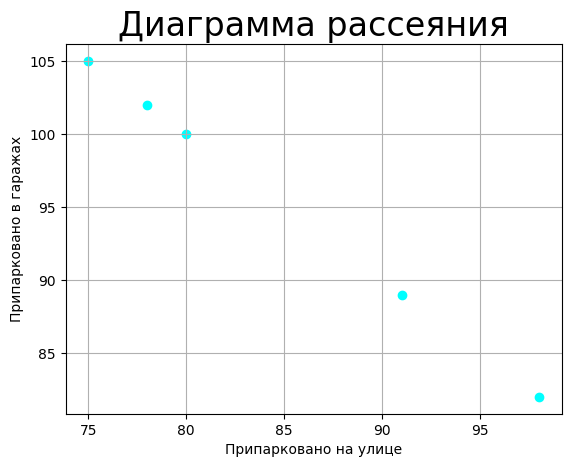

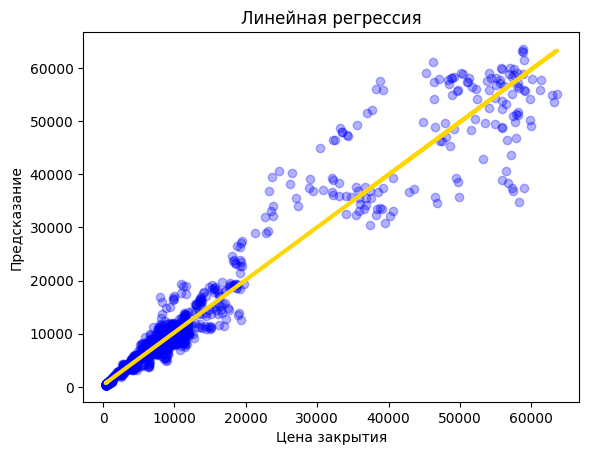

Угол наклона и перехват
[[0.98893729]]
[354.08558181]
Предсказание
[[34582.76786095]
 [35622.15084671]
 [37232.3781069 ]
 [36631.77670928]
 [37515.36251368]
 [39149.75940135]
 [36807.79765831]
 [35499.33472412]
 [35756.62654   ]
 [33565.42828749]
 [33393.86744566]
 [37332.01353931]
 [36629.07691047]
 [36789.82866767]]
Точность предсказания:  0.9490624388820347
Скрытые значения
         close
1987  34611.58
1988  35662.59
1989  37290.83
1990  36683.51
1991  37576.98
1992  39229.66
1993  36861.50
1994  35538.40
1995  35798.57
1996  33582.86
1997  33409.38
1998  37391.58
1999  36680.78
2000  36843.33
               Area         Room         Price    Price(USD)
count  3.479000e+03  3479.000000  3.479000e+03  3.479000e+03
mean   8.744000e+06     2.079908  5.359023e+09  1.786341e+05
std    3.167266e+08     0.758275  8.099935e+09  2.699978e+05
min    3.000000e+01     0.000000  3.600000e+06  1.200000e+02
25%    6.900000e+01     2.000000  1.418250e+09  4.727500e+04
50%    9.000000e+01     2.000

C:\Users\tsash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


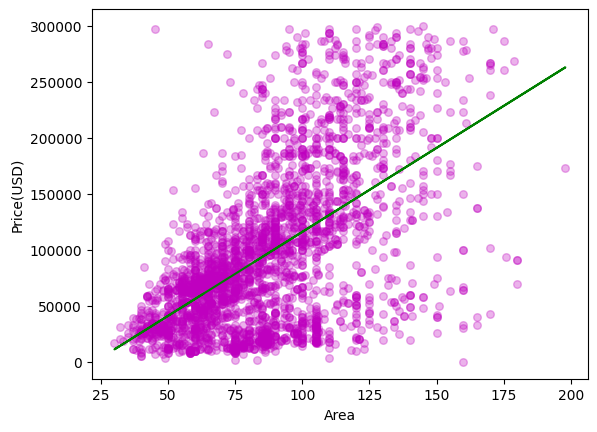

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def parking_corr():
    street = np.array([80, 98, 75, 91, 78])
    garage = np.array([100, 82, 105, 89, 102])
    print(np.corrcoef(street, garage)[0,1])
    plt.grid(True)
    plt.title("Диаграмма рассеяния", fontsize=24)
    plt.xlabel("Припарковано на улице")
    plt.ylabel("Припарковано в гаражах")
    plt.scatter(street, garage, marker='o', color='cyan')

def bitcoin_prediction():
    df = pd.read_csv('bitcoin.csv')
    proj = 14
    #df['predict'] = df['close'].shift(proj)
    #df['predict'] = df['predict'].shift(-proj)
    df['predict'] = df['close'].shift(-proj)
    #print(df.describe())
    X = pd.DataFrame(df, columns=['close'], )
    y = pd.DataFrame(df, columns=['predict'])
    X = np.array(X,type(float))
    y = np.array(y,type(float))
    X = X[:-proj]
    y = y[:-proj]
    regression = LinearRegression()
    regression.fit(X, y)
    plt.figure()
    plt.title(label="Линейная регрессия")
    plt.scatter(X,y, color='blue', alpha=0.3)
    plt.plot(X, regression.predict(X), color='gold', linewidth=3)
    plt.xlabel('Цена закрытия')
    plt.ylabel('Предсказание')
    plt.show()
    print("Угол наклона и перехват")
    print(regression.coef_)
    print(regression.intercept_)
    print("Предсказание")
    print(regression.predict(df[['close']][-proj:]))
    print("Точность предсказания: ",regression.score(X,y))
    print("Скрытые значения")
    print(df[['close']][-proj:])

def house_price_regression():
    dframe = pd.read_csv('housePrice.csv')
    print(dframe.describe())
    dframe = dframe[(dframe.Area < 200) & (dframe['Price(USD)'] < 300000)]
    x = np.array(dframe['Area'])
    y = np.array(dframe['Price(USD)'])
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0(y-перехват) = {}  \
          \nb_1(угол наклона) = {}".format(b[0], b[1]))
    # plotting regression line
    plot_regression_line(x, y, b)

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    return b_0, b_1

def plot_regression_line(x, y, b):
    plt.ticklabel_format(style='plain')
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30, alpha=0.3)
    y_pred = b[0] + b[1]*x
    plt.plot(x, y_pred, color = "g")
    plt.xlabel('Area')
    plt.ylabel('Price(USD)')
    plt.show()

if __name__ == "__main__":
    parking_corr()
    bitcoin_prediction()
    house_price_regression()
